In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor
import pylab 
from scipy import stats


In [46]:
food = pd.read_csv("food_cleaned.csv")
food["month"] = food["month"].astype("str")
food["year"] = food["year"].astype("str")
food["size"] = food["size"].astype("str")
food = food.drop(["Unnamed: 0", "Id", "date", "id", "number", "street", "city", "company", 'zip', 'lat', 'lon', 'pickup', 'planned', "day"], axis = 1)
food.loc[~food["state"].isin(["California", "New York"]), "state"] = "Underdeveloped"
food = pd.get_dummies(food)

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_applied,type_bus,type_comm,type_edu-health,type_fin,type_food,type_other,type_sale,type_soft,type_web
0,40.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,100.00,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,85.00,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,50.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,20.00,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,35.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,30.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,50.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,5.00,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
food.to_csv("food_outliers.csv", sep = ",")

In [27]:
food["pounds"].quantile(.9)

125.80000000000018

In [28]:
food[food["pounds"] > 500]

,Unnamed: 0,Id,date,pounds,id,number,street,city,company,state,...,lat,lon,pickup,planned,month,day,year,weekday,size,type
774,1324,1428,2017-09-01,600.0,265,277,Carolina Street,San Francisco,Zesty SF,California,...,37.765149,-122.400468,60,False,9,1,2017,Friday,200.0,food
926,1522,1626,2017-09-13,800.0,17,233,5th Avenue,New York,ZeroCater,New York,...,40.744030,-73.987265,25,False,9,13,2017,Wednesday,200.0,food
1383,2079,2184,2017-10-19,850.0,486,344,Thomas L Berkley Way,Oakland,The Town Kitchen,California,...,37.808617,-122.265361,30,False,10,19,2017,Thursday,10.0,food
1482,2192,2297,2017-10-26,570.0,265,277,Carolina Street,San Francisco,Zesty SF,California,...,37.765149,-122.400468,60,False,10,26,2017,Thursday,200.0,food
1603,2351,2457,2017-11-03,2000.0,463,249,West 17th Street,New York,Twitter NYC,New York,...,40.741526,-73.999886,30,False,11,3,2017,Friday,5000.0,comm
2055,2918,3027,2017-12-06,600.0,265,277,Carolina Street,San Francisco,Zesty SF,California,...,37.765149,-122.400468,60,False,12,6,2017,Wednesday,200.0,food
2378,3437,3554,2018-01-08,560.0,265,277,Carolina Street,San Francisco,Zesty SF,California,...,37.765149,-122.400468,60,False,1,8,2018,Monday,200.0,food
2504,3609,3726,2018-01-16,600.0,23,1121,Industrial Road,San Carlos,EAT Club,California,...,37.502926,-122.246888,20,False,1,16,2018,Tuesday,1000.0,food
2969,4218,4337,2018-02-16,669.0,265,277,Carolina Street,San Francisco,Zesty SF,California,...,37.765149,-122.400468,60,False,2,16,2018,Friday,200.0,food
3311,4647,4799,2018-03-08,776.0,333,985,3rd Street,Oakland,Habit.com,California,...,37.800155,-122.285510,40,False,3,8,2018,Thursday,10.0,web


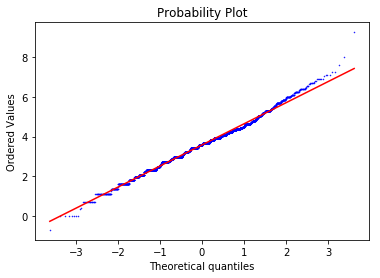

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log(food["pounds"])
res = stats.probplot(x, plot = plt)
ax.get_lines()[0].set_markersize(0.5)

pylab.show()

In [30]:
food.columns

Index(['Unnamed: 0', 'Id', 'date', 'pounds', 'id', 'number', 'street', 'city',
       'company', 'state', 'zip', 'lat', 'lon', 'pickup', 'planned', 'month',
       'day', 'year', 'weekday', 'size', 'type'],
      dtype='object')

In [206]:
outliers = np.array([3312, 3631, 4006, 479, 4254, 3377, 912, 3281, 4361, 4303, 1936,
                     946, 927, 1615, 2836, 2457, 2498, 3235, 3354, 3147, 4279, 3353,
                     864, 1729, 1861, 2690, 2313, 1604, 3378, 1038, 837, 3759]) - 1
food[food.index.isin(outliers)]["pounds"]

478         2.0
836         1.0
863         1.4
911         2.0
926       800.0
945         3.0
1037        0.5
1603     2000.0
1614        5.0
1728        1.0
1860        1.0
1935        6.0
2312        2.0
2456        1.0
2497        1.0
2689        1.0
2835        2.0
3146        2.0
3234        5.0
3280        1.5
3311      776.0
3352     1400.0
3353     1200.0
3376        3.0
3377     3000.0
3630        2.0
3758    10312.0
4005     1000.0
4253     1134.0
4278        5.0
4302      300.0
4360     1400.0
Name: pounds, dtype: float64

In [218]:
food[~food.index.isin(outliers)]["pounds"].sort_values(ascending = False)

4166    1200.0
4169    1200.0
4691    1000.0
4575    1000.0
4622    1000.0
4105    1000.0
4465    1000.0
4610     900.0
4496     900.0
1383     850.0
4445     800.0
4207     800.0
4125     800.0
4151     800.0
4723     800.0
4595     750.0
4518     700.0
4082     700.0
4381     700.0
4640     700.0
2969     669.0
3501     620.0
3596     620.0
4335     600.0
3937     600.0
774      600.0
4413     600.0
4232     600.0
4063     600.0
3372     600.0
         ...  
2948       3.0
4356       3.0
3082       3.0
2776       3.0
3104       3.0
3221       3.0
2696       3.0
2676       3.0
3281       3.0
3338       3.0
1334       3.0
2578       3.0
710        3.0
3564       3.0
791        3.0
2508       3.0
784        3.0
2480       3.0
4571       3.0
2380       2.0
1504       2.0
3004       2.0
4705       2.0
298        2.0
3073       2.0
704        2.0
2377       2.0
2337       2.0
4619       2.0
2305       1.0
Name: pounds, Length: 4721, dtype: float64

\begin{align*}
&- \text{Running t-test with bonferroni correction on internally studentized residuals in R identified 32 outliers.}\\
&- \text{Outliers mostly datapoints that have pounds that are very high and very low.} \\
&- \text{Identified some reasonable donations such as 5 or 6 pounds as outliers.}\\ 
& \text{Didn't mark some really large donations such as 1200 pounds as an outlier nor other small donations that's 1 or 2 pounds}\\
\end{align*}

In [207]:
X = np.array(food)
clf = IsolationForest(random_state = 123568, contamination = 0.015, n_estimators = 1000)
clf.fit(X)
y = clf.predict(X)

In [209]:
food["outlier"] = y

In [228]:
food.columns

Index(['pounds', 'state_California', 'state_New York', 'state_Underdeveloped',
       'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'year_2017', 'year_2018', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'size_10.0', 'size_1000.0', 'size_10000.0',
       'size_10001.0', 'size_200.0', 'size_50.0', 'size_500.0', 'size_5000.0',
       'type_applied', 'type_bus', 'type_comm', 'type_edu-health', 'type_fin',
       'type_food', 'type_other', 'type_sale', 'type_soft', 'type_web',
       'outlier'],
      dtype='object')

In [234]:
food[(food["outlier"] == -1)]["pounds"].value_counts().sort_values()

225.00      1
26.00       1
175.00      1
21.84       1
300.00      1
200.00      1
900.00      1
25.00       1
48.00       1
7.00        1
210.00      1
20.82       1
105.00      1
6.00        1
10312.00    1
100.00      1
33.00       1
45.81       1
400.00      1
64.00       1
88.00       1
240.00      1
32.00       1
65.00       1
350.00      1
2000.00     1
90.00       1
60.00       1
27.51       1
113.67      1
24.00       2
13.00       2
5.00        2
46.00       2
70.00       2
1200.00     2
35.00       2
16.00       2
8.00        2
10.00       2
34.00       2
50.00       3
80.00       3
36.00       3
30.00       3
40.00       3
20.00       5
Name: pounds, dtype: int64

\begin{align*}
&- \text{A lot of values that seem like reasonable donations were marked as outliers}\\
& \text{Most likely due to the features}
\end{align*}